In [5]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

print(project_root)
print(os.listdir(project_root))  # должен содержать 'src'

from src.utils import LOGGER

CHECKPOINT_DIR = os.path.join(project_root, "data", "checkpoints", "exp_mlp_plr")
LOG_PATH = os.path.join(CHECKPOINT_DIR, "MLP_PLR_finetune_log")

# Загрузка логов
LOGGER.reset()
LOGGER.load(LOG_PATH)


/home/keramika/SGDiffusion
['.venv', 'pyproject.toml', '.DS_Store', 'batch_size_loss.png', 'README.md', 'scripts', 'uv.lock', 'source', 'data', 'src', '.gitignore', '.git', 'notebooks']


In [6]:
weights_key = [k for k in LOGGER.dict.keys() if "embedding.periodic.weight" in k][0]
loss_key = "loss"

last_iters_percentile = 0.999
frequencies = np.array(LOGGER.dict[weights_key])
losses = np.array(LOGGER.dict[loss_key])

frequencies = frequencies[-int(last_iters_percentile * len(frequencies)):]
losses = losses[-int(last_iters_percentile * len(losses)):]

flat_weights = frequencies.reshape(frequencies.shape[0], -1)

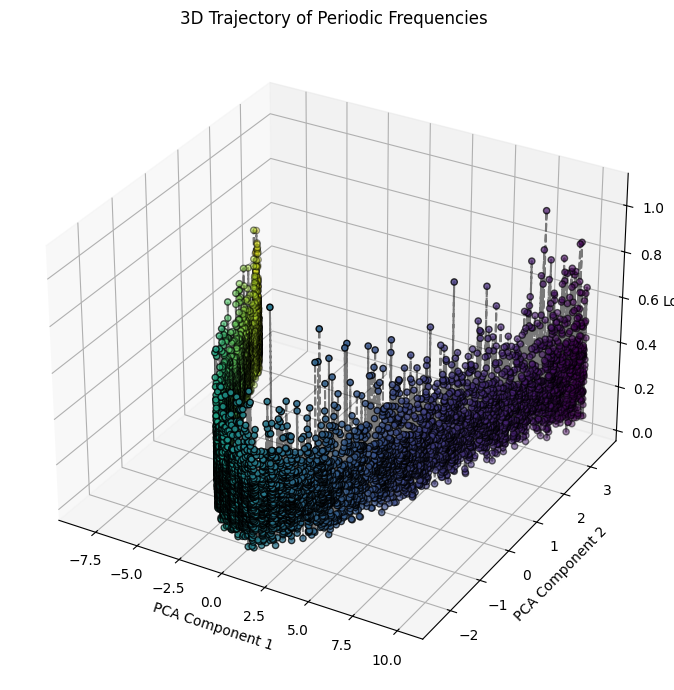

In [7]:
pca = PCA(n_components=2)
trajectory_2d = pca.fit_transform(flat_weights)

# 3D Траектория
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = np.linspace(0, 1, len(flat_weights))
ax.scatter(
    trajectory_2d[:, 0], trajectory_2d[:, 1], losses,
    c=colors, cmap='viridis', edgecolor='k'
)
ax.plot(
    trajectory_2d[:, 0], trajectory_2d[:, 1], losses,
    color='black', alpha=0.5, linestyle='--'
)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('Loss')
ax.set_title(f"3D Trajectory of Periodic Frequencies")
plt.tight_layout()
plt.show()


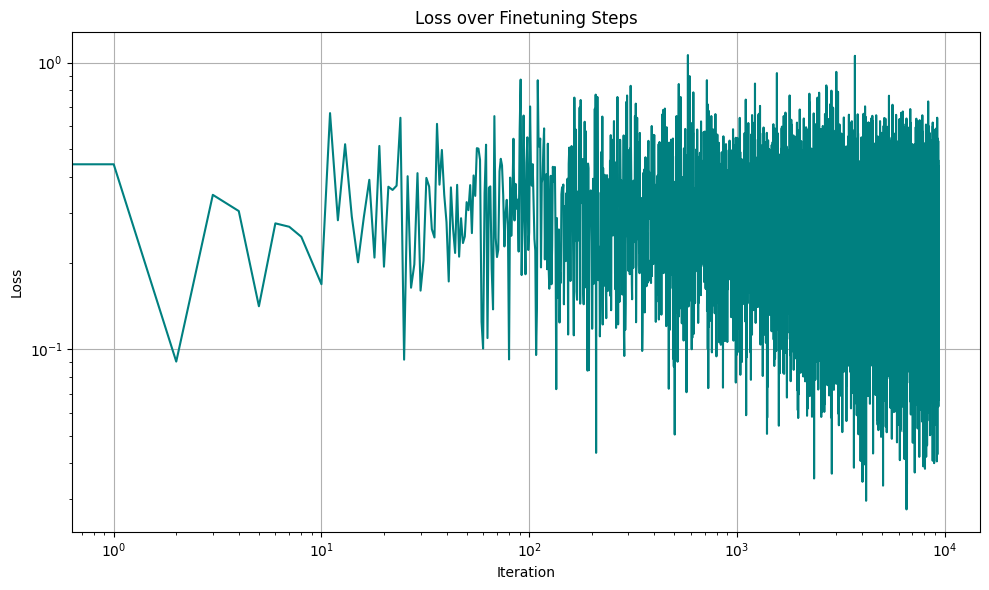

In [8]:
plt.figure(figsize=(10, 6))
plt.loglog(losses, color='teal')
plt.title("Loss over Finetuning Steps")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()